In [1]:
# Regressão Linear Múltipla

In [2]:
import numpy as np
import pandas as pd

In [3]:
enem = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [4]:
enem.head(10)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
5,"1,90E+11",São José do Rio Preto,18,F,1,branca,1,2,pública,35028927.0,...,612.8,Espanhol,1.0,120.0,160.0,120.0,80.0,100.0,580.0,Não
6,"1,90E+11",Franca,32,M,1,parda,1,1,não_respondeu,NaN,...,584.1,Espanhol,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
7,"1,90E+11",Santo André,20,F,1,parda,1,1,não_respondeu,NaN,...,508.5,Espanhol,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
8,"1,90E+11",São Paulo,26,M,1,branca,1,1,não_respondeu,NaN,...,681.2,Espanhol,1.0,180.0,200.0,200.0,200.0,120.0,900.0,Sim
9,"1,90E+11",Santo André,44,F,2,parda,1,1,não_respondeu,NaN,...,488.1,Espanhol,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim


In [5]:
# Análise inicial

In [6]:
enem.columns

Index(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'IDADE', 'SEXO',
       'TP_ESTADO_CIVIL', 'RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'ESCOLA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NOTA_CN',
       'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5', 'NOTA_REDACAO',
       'INTERNET'],
      dtype='object')

In [7]:
enem.shape

(499940, 28)

In [8]:
# Selecionar apenas um colégio para fins de análise

In [9]:
colegiox = enem.loc[enem.CO_ESCOLA == 35132287]

In [10]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [11]:
colegiox.shape

(130, 28)

In [12]:
# Valores Faltantes - valores missing (NA)

In [13]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

In [14]:
# Análise dos tipos das nossas variáveis

In [15]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
corr_df = colegiox.corr()

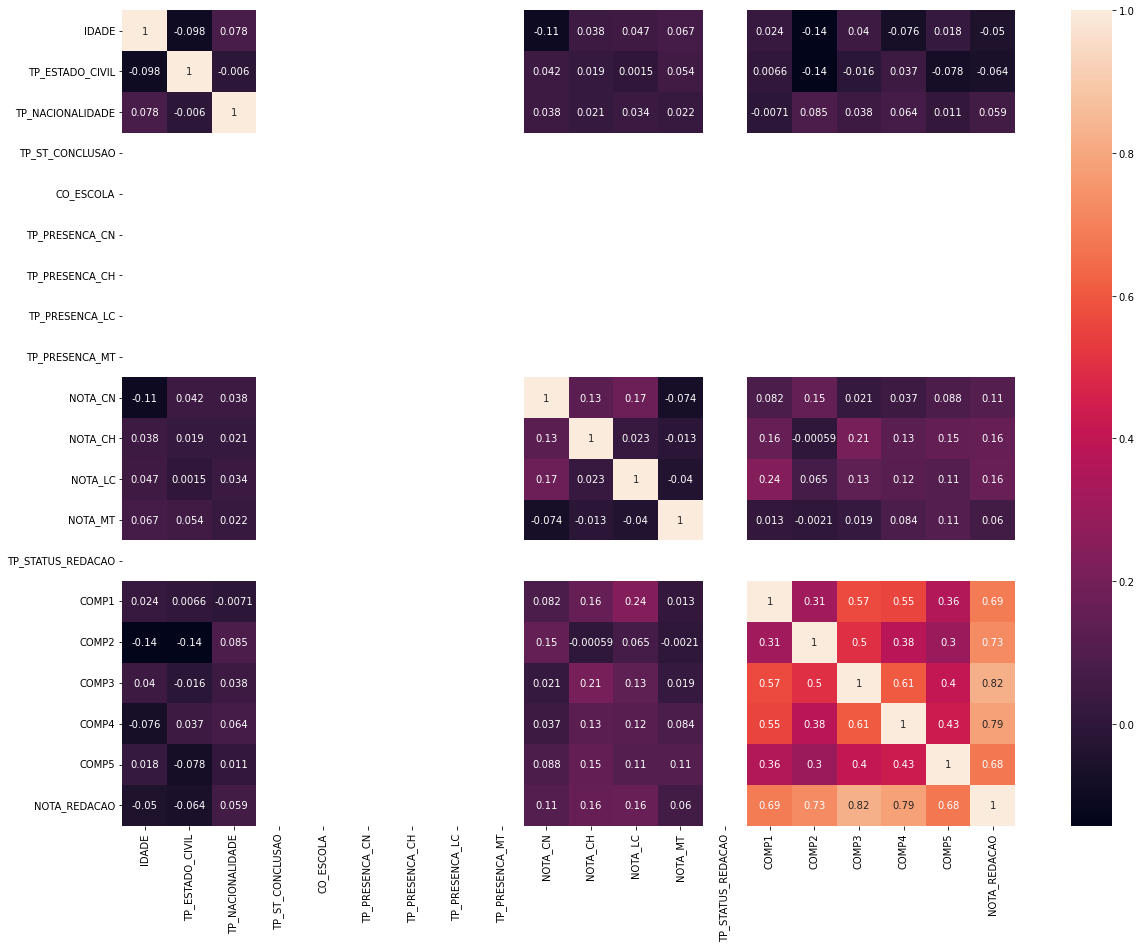

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df, annot=True)
plt.show()

# Premissa 1: Correlação

Regressão Linear Múltipla com Statsmodel

In [20]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Modelo 1

In [21]:
# Criação do MODELO 1
# Y = bo + b1x1 + ... + bpxp

NOTA_REDACAO = bo + b1*COMP2 + b2*COMP4 + b3*COMP5
Intercept = bo

NOTA_REDACAO = 116.1987 + 1.2831*COMP2 + 1.7298*COMP4 + 1.1993*COMP5


In [22]:
modelo1 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegiox).fit()

Teste de Hipótese de Significância estatística do modelo construído

Ho = o modelo é significativo

Ha = o modelo não é significativo

Prob (F-statistic) < 0.05 ==> valida o nosso modelo de regressão ajustado

Testes de Hipótese - significância dos coeficientes ajustados
Valida cada coeficiente da regressão - P>|t| < 0.05
Ho = o coeficiente é significativo
Ha = o coeficiente não é significativo


In [23]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           3.97e-70
Time:                        21:08:20   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0

In [24]:
modelo1.aic

1216.59304638052

# Análises das premissas dos modelo 1

In [25]:
import scipy.stats as stats

In [ ]:
# ei = NOTA_REDACAO - ^yi (116.1987 + 1.2831*140 + 1.7298*160 + 1.1993*160)

In [26]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [27]:
116.1987 + 1.2831*140 + 1.7298*160 + 1.1993*160

764.4887

In [31]:
ei = 760 - 764.4887

In [32]:
ei

-4.488699999999994

In [30]:
residuos = modelo1.resid
residuos

17        -4.498054
10760     33.309358
13315     -5.718021
20006    -26.432059
26697      1.349594
            ...    
426829    35.760528
428241   -17.683137
443242   -17.497499
462446   -56.783460
483420    34.529325
Length: 130, dtype: float64

In [33]:
colegiox['residuos'] = residuos
colegiox.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_11888\1093953978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['residuos'] = residuos


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,residuos
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,-4.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,33.309358
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,-5.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,-26.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,1.349594


# Premissa 2 - Normalidade dos resíduos 

Shapiro - Wilk

Ho = os residuos tem distribuição normal: p > 0.05

Ha = os residuos não tem distribuição normal: p <= 0.05

In [34]:
estatistica, p = stats.shapiro(residuos)

In [35]:
p

0.15436169505119324

In [36]:
print('p-valor: {}'.format(p))

p-valor: 0.15436169505119324


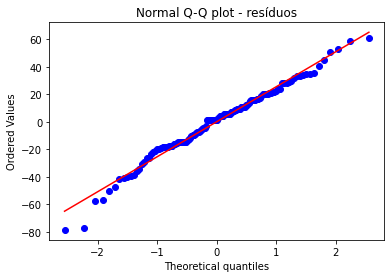

In [39]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - resíduos')
plt.show()

# Premissa 3 - Homocedasticidade

In [40]:
# resíduos com variação constante

Text(0.5, 0, 'Valores Previstos')

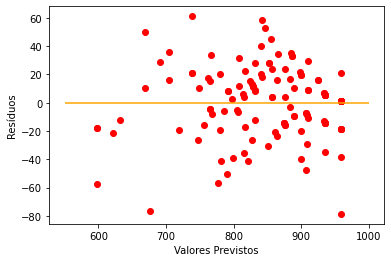

In [43]:
plt.scatter(y=residuos, x=modelo1.predict(), color='red')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Previstos')

Teste Breusch-Pagan (homocedasticidade/heterocedasticidade)

Ho = existe homocedasticidade: p > 0.05

Ha = não existe homocedasticidade: p <= 0.05

In [46]:
from statsmodels.compat import lzip

In [47]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo1.resid, modelo1.model.exog)

In [49]:
print('p-valor: {}'.format(p))

p-valor: 0.047271689874475095


# Premissa 4 - Outliers nos resíduos

Valores de resíduos que estão fora do intervalo (-3,3)

In [50]:
outliers = modelo1.outlier_test()

In [51]:
outliers.max()

student_resid    2.466219
unadj_p          0.957876
bonf(p)          1.000000
dtype: float64

In [52]:
outliers.min()

student_resid   -3.260297
unadj_p          0.001434
bonf(p)          0.186452
dtype: float64

# Premissa 5 - Multicolinearidade

- Somente as variáveis independentes
- Considerar como problema de multicolinearidade quando você encontrar r > 0.9

In [53]:
variaveis = colegiox[['COMP2', 'COMP4', 'COMP5']]

In [54]:
variaveis.head()

,COMP2,COMP4,COMP5
17,140.0,160.0,160.0
10760,200.0,200.0,140.0
13315,140.0,200.0,120.0
20006,180.0,180.0,140.0
26697,200.0,200.0,200.0


In [55]:
correlacoes = variaveis.corr()
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


Fator de Inflação de Variancia - VIF (baseado no coeficiente de determinação)
- Esse valor deve ser menor 5

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [58]:
vif = add_constant(variaveis) # função pra calcular o vif espera uma constante
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const    72.466982
COMP2     1.196714
COMP4     1.335832
COMP5     1.259221
dtype: float64

# Calculando previsão

In [59]:
# Criar uma coluna de previsão
colegiox['previsao'] = modelo1.fittedvalues

C:\Users\marco\AppData\Local\Temp\ipykernel_11888\2867230612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao'] = modelo1.fittedvalues


In [60]:
colegiox

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,residuos,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,-4.498054,764.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,33.309358,886.690642
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,-5.718021,785.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,-26.432059,826.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,1.349594,958.650406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426829,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,120.0,160.0,140.0,160.0,740.0,Sim,35.760528,704.239472
428241,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35132287.0,...,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim,-17.683137,597.683137
443242,"1,90E+11",São Paulo,17,F,1,amarela,1,2,privada,35132287.0,...,1.0,140.0,200.0,160.0,160.0,140.0,800.0,Sim,-17.497499,817.497499
462446,"1,90E+11",São Paulo,18,M,1,branca,1,2,privada,35132287.0,...,1.0,120.0,160.0,140.0,180.0,120.0,720.0,Sim,-56.783460,776.783460


# Tarefa avaliativa 1 - 20 pts 

- Revisem o modelo 1 ajustado
- Construa um novo modelo considerando novas variáveis independentes